## Importations

In [1]:
# # pip install nbconvert
!jupyter nbconvert --to script g2v_utils.ipynb

[NbConvertApp] Converting notebook g2v_utils.ipynb to script
[NbConvertApp] Writing 9119 bytes to g2v_utils.py


In [2]:
# Importations
import networkx as nx
import matplotlib.pyplot as plt
import os 
import glob
import numpy as np
import umap
import seaborn as sns
import pandas as pd
from karateclub import EgoNetSplitter
from karateclub import Graph2Vec
from compress_pickle import load as cload
from compress_pickle import dump as cdump
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from g2v_utils import *
np.random.seed(42)

## Utils

## Graphs
- All nx graphs need to be in a list "nxgraphs": POPULATE IT

### Food graphs

In [4]:
# Load graphs
# Networks
# dfNetworks = cload('DF_networks.lzma')
dfNetworks= cload('DF_with_norm_dpv.lzma')
# nxgraphs = dfNetworks[dfNetworks['product'] == 'corn'].network.tolist()

In [5]:
dfNetworks

,product,year,network,network type,nodes,edges,avg_in_deg,avg_out_deg,avg_dvp_s,avg_dvp_d,avg_bc,avg_degree_centrality,net_density,avg_closenness,avg_clustering_coef
0,corn,1996,"(Japan, Australia, Finland, Germany, Macao, Ch...",DiGraph,102,906,8.882353,8.882353,0.194118,0.194198,0.004603,0.175888,0.087944,0.226249,0.510
1,corn,1997,"(Latvia, Germany, Denmark, Slovakia, Chile, Fr...",DiGraph,125,1367,10.936000,10.936000,0.194376,0.194417,0.006072,0.176387,0.088194,0.283646,0.539
2,corn,1998,"(Uganda, Tanzania, Japan, Australia, France, N...",DiGraph,132,1446,10.954545,10.954545,0.191970,0.192016,0.006276,0.167245,0.083622,0.280297,0.571
3,corn,1999,"(Iceland, Denmark, United Kingdom, Japan, New ...",DiGraph,138,1721,12.471014,12.471014,0.204792,0.204831,0.006190,0.182059,0.091029,0.306644,0.597
4,corn,2000,"(Japan, Thailand, Belgium, Grenada, Canada, Ch...",DiGraph,163,2175,13.343558,13.343558,0.191516,0.191542,0.005777,0.164735,0.082368,0.306102,0.577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,mushrooms,2016,"(Switzerland, Mexico, China, Croatia, Costa Ri...",DiGraph,158,1714,10.848101,10.848101,0.153787,0.153791,0.005249,0.138192,0.069096,0.248964,0.561
1321,mushrooms,2017,"(United Kingdom, United States, Côte d'Ivoire,...",DiGraph,155,1673,10.793548,10.793548,0.155719,0.155736,0.005224,0.140176,0.070088,0.244169,0.554
1322,mushrooms,2018,"(Austria, Germany, India, France, Jordan, Neth...",DiGraph,156,1711,10.967949,10.967949,0.163309,0.163348,0.004190,0.141522,0.070761,0.235117,0.567
1323,mushrooms,2019,"(Bosnia and Herzegovina, Macedonia, Germany, P...",DiGraph,156,1787,11.455128,11.455128,0.159634,0.159644,0.004068,0.147808,0.073904,0.239009,0.501


### Process graphs

In [6]:
# Extract all nodes across graphs
all_nodes, all_centroids, nxgraphs_raw = nodesExtract(dfNetworks, verbose=False)

In [7]:
# Nodes dict
nodes_map = {n:idx for idx, n in enumerate(all_nodes)}
inv_nodes_map = {v: k for k, v in nodes_map.items()}

# All nodes 
print("Total nodes across all graphs:", len(all_nodes))
nxgraphs = cleanGraphs(nxgraphs_raw,nodes_map,inv_nodes_map, verbose=False)

Total nodes across all graphs: 203
DiGraph with 102 nodes and 906 edges
Total processed graphs: 1
DiGraph with 125 nodes and 1367 edges
Total processed graphs: 2
DiGraph with 132 nodes and 1446 edges
Total processed graphs: 3
DiGraph with 138 nodes and 1721 edges
Total processed graphs: 4
DiGraph with 163 nodes and 2175 edges
Total processed graphs: 5
DiGraph with 162 nodes and 2298 edges
Total processed graphs: 6
DiGraph with 168 nodes and 2506 edges
Total processed graphs: 7
DiGraph with 169 nodes and 2635 edges
Total processed graphs: 8
DiGraph with 175 nodes and 2750 edges
Total processed graphs: 9
DiGraph with 169 nodes and 2859 edges
Total processed graphs: 10
DiGraph with 173 nodes and 2899 edges
Total processed graphs: 11
DiGraph with 181 nodes and 3048 edges
Total processed graphs: 12
DiGraph with 175 nodes and 3151 edges
Total processed graphs: 13
DiGraph with 179 nodes and 3235 edges
Total processed graphs: 14
DiGraph with 175 nodes and 3389 edges
Total processed graphs: 15


DiGraph with 132 nodes and 990 edges
Total processed graphs: 129
DiGraph with 149 nodes and 1265 edges
Total processed graphs: 130
DiGraph with 150 nodes and 1307 edges
Total processed graphs: 131
DiGraph with 160 nodes and 1415 edges
Total processed graphs: 132
DiGraph with 160 nodes and 1434 edges
Total processed graphs: 133
DiGraph with 159 nodes and 1551 edges
Total processed graphs: 134
DiGraph with 160 nodes and 1608 edges
Total processed graphs: 135
DiGraph with 162 nodes and 1663 edges
Total processed graphs: 136
DiGraph with 172 nodes and 1802 edges
Total processed graphs: 137
DiGraph with 170 nodes and 1814 edges
Total processed graphs: 138
DiGraph with 173 nodes and 1806 edges
Total processed graphs: 139
DiGraph with 171 nodes and 1908 edges
Total processed graphs: 140
DiGraph with 174 nodes and 1905 edges
Total processed graphs: 141
DiGraph with 163 nodes and 1781 edges
Total processed graphs: 142
DiGraph with 161 nodes and 1873 edges
Total processed graphs: 143
DiGraph wit

Total processed graphs: 254
DiGraph with 170 nodes and 1914 edges
Total processed graphs: 255
DiGraph with 172 nodes and 2067 edges
Total processed graphs: 256
DiGraph with 172 nodes and 2141 edges
Total processed graphs: 257
DiGraph with 173 nodes and 2235 edges
Total processed graphs: 258
DiGraph with 177 nodes and 2377 edges
Total processed graphs: 259
DiGraph with 175 nodes and 2419 edges
Total processed graphs: 260
DiGraph with 173 nodes and 2452 edges
Total processed graphs: 261
DiGraph with 180 nodes and 2527 edges
Total processed graphs: 262
DiGraph with 181 nodes and 2669 edges
Total processed graphs: 263
DiGraph with 183 nodes and 2747 edges
Total processed graphs: 264
DiGraph with 181 nodes and 2842 edges
Total processed graphs: 265
DiGraph with 177 nodes and 2854 edges
Total processed graphs: 266
DiGraph with 178 nodes and 2950 edges
Total processed graphs: 267
DiGraph with 181 nodes and 3046 edges
Total processed graphs: 268
DiGraph with 180 nodes and 3070 edges
Total proc

Total processed graphs: 380
DiGraph with 180 nodes and 3219 edges
Total processed graphs: 381
DiGraph with 181 nodes and 3352 edges
Total processed graphs: 382
DiGraph with 176 nodes and 3443 edges
Total processed graphs: 383
DiGraph with 182 nodes and 3513 edges
Total processed graphs: 384
DiGraph with 182 nodes and 3611 edges
Total processed graphs: 385
DiGraph with 184 nodes and 3862 edges
Total processed graphs: 386
DiGraph with 186 nodes and 4058 edges
Total processed graphs: 387
DiGraph with 188 nodes and 4143 edges
Total processed graphs: 388
DiGraph with 183 nodes and 4210 edges
Total processed graphs: 389
DiGraph with 190 nodes and 4366 edges
Total processed graphs: 390
DiGraph with 189 nodes and 4388 edges
Total processed graphs: 391
DiGraph with 189 nodes and 4339 edges
Total processed graphs: 392
DiGraph with 183 nodes and 4560 edges
Total processed graphs: 393
DiGraph with 190 nodes and 4655 edges
Total processed graphs: 394
DiGraph with 183 nodes and 4862 edges
Total proc

Total processed graphs: 507
DiGraph with 156 nodes and 1349 edges
Total processed graphs: 508
DiGraph with 159 nodes and 1446 edges
Total processed graphs: 509
DiGraph with 160 nodes and 1522 edges
Total processed graphs: 510
DiGraph with 160 nodes and 1578 edges
Total processed graphs: 511
DiGraph with 168 nodes and 1684 edges
Total processed graphs: 512
DiGraph with 167 nodes and 1660 edges
Total processed graphs: 513
DiGraph with 172 nodes and 1726 edges
Total processed graphs: 514
DiGraph with 171 nodes and 1854 edges
Total processed graphs: 515
DiGraph with 174 nodes and 1865 edges
Total processed graphs: 516
DiGraph with 171 nodes and 1867 edges
Total processed graphs: 517
DiGraph with 165 nodes and 1973 edges
Total processed graphs: 518
DiGraph with 169 nodes and 2053 edges
Total processed graphs: 519
DiGraph with 173 nodes and 2164 edges
Total processed graphs: 520
DiGraph with 170 nodes and 2286 edges
Total processed graphs: 521
DiGraph with 171 nodes and 2313 edges
Total proc

Total processed graphs: 633
DiGraph with 139 nodes and 954 edges
Total processed graphs: 634
DiGraph with 142 nodes and 1012 edges
Total processed graphs: 635
DiGraph with 151 nodes and 1016 edges
Total processed graphs: 636
DiGraph with 152 nodes and 1086 edges
Total processed graphs: 637
DiGraph with 150 nodes and 1111 edges
Total processed graphs: 638
DiGraph with 146 nodes and 1057 edges
Total processed graphs: 639
DiGraph with 154 nodes and 1106 edges
Total processed graphs: 640
DiGraph with 157 nodes and 1113 edges
Total processed graphs: 641
DiGraph with 154 nodes and 1164 edges
Total processed graphs: 642
DiGraph with 156 nodes and 1126 edges
Total processed graphs: 643
DiGraph with 156 nodes and 1163 edges
Total processed graphs: 644
DiGraph with 157 nodes and 1232 edges
Total processed graphs: 645
DiGraph with 148 nodes and 1182 edges
Total processed graphs: 646
DiGraph with 155 nodes and 1247 edges
Total processed graphs: 647
DiGraph with 149 nodes and 1220 edges
Total proce

Total processed graphs: 762
DiGraph with 151 nodes and 993 edges
Total processed graphs: 763
DiGraph with 157 nodes and 968 edges
Total processed graphs: 764
DiGraph with 155 nodes and 1032 edges
Total processed graphs: 765
DiGraph with 153 nodes and 1042 edges
Total processed graphs: 766
DiGraph with 155 nodes and 1139 edges
Total processed graphs: 767
DiGraph with 151 nodes and 1215 edges
Total processed graphs: 768
DiGraph with 156 nodes and 1247 edges
Total processed graphs: 769
DiGraph with 167 nodes and 1339 edges
Total processed graphs: 770
DiGraph with 158 nodes and 1257 edges
Total processed graphs: 771
DiGraph with 157 nodes and 1330 edges
Total processed graphs: 772
DiGraph with 155 nodes and 1382 edges
Total processed graphs: 773
DiGraph with 155 nodes and 1400 edges
Total processed graphs: 774
DiGraph with 148 nodes and 1406 edges
Total processed graphs: 775
DiGraph with 65 nodes and 284 edges
Total processed graphs: 776
DiGraph with 92 nodes and 448 edges
Total processed 

Total processed graphs: 895
DiGraph with 164 nodes and 1747 edges
Total processed graphs: 896
DiGraph with 166 nodes and 1900 edges
Total processed graphs: 897
DiGraph with 168 nodes and 1980 edges
Total processed graphs: 898
DiGraph with 159 nodes and 1984 edges
Total processed graphs: 899
DiGraph with 158 nodes and 1946 edges
Total processed graphs: 900
DiGraph with 77 nodes and 306 edges
Total processed graphs: 901
DiGraph with 89 nodes and 400 edges
Total processed graphs: 902
DiGraph with 91 nodes and 403 edges
Total processed graphs: 903
DiGraph with 103 nodes and 498 edges
Total processed graphs: 904
DiGraph with 128 nodes and 693 edges
Total processed graphs: 905
DiGraph with 135 nodes and 699 edges
Total processed graphs: 906
DiGraph with 136 nodes and 765 edges
Total processed graphs: 907
DiGraph with 138 nodes and 783 edges
Total processed graphs: 908
DiGraph with 139 nodes and 848 edges
Total processed graphs: 909
DiGraph with 139 nodes and 888 edges
Total processed graphs:

Total processed graphs: 1031
DiGraph with 135 nodes and 1034 edges
Total processed graphs: 1032
DiGraph with 140 nodes and 1063 edges
Total processed graphs: 1033
DiGraph with 135 nodes and 1121 edges
Total processed graphs: 1034
DiGraph with 144 nodes and 1179 edges
Total processed graphs: 1035
DiGraph with 145 nodes and 1253 edges
Total processed graphs: 1036
DiGraph with 147 nodes and 1309 edges
Total processed graphs: 1037
DiGraph with 143 nodes and 1278 edges
Total processed graphs: 1038
DiGraph with 147 nodes and 1294 edges
Total processed graphs: 1039
DiGraph with 149 nodes and 1344 edges
Total processed graphs: 1040
DiGraph with 148 nodes and 1386 edges
Total processed graphs: 1041
DiGraph with 147 nodes and 1371 edges
Total processed graphs: 1042
DiGraph with 152 nodes and 1464 edges
Total processed graphs: 1043
DiGraph with 151 nodes and 1497 edges
Total processed graphs: 1044
DiGraph with 149 nodes and 1564 edges
Total processed graphs: 1045
DiGraph with 154 nodes and 1511 e

Total processed graphs: 1157
DiGraph with 137 nodes and 694 edges
Total processed graphs: 1158
DiGraph with 135 nodes and 703 edges
Total processed graphs: 1159
DiGraph with 141 nodes and 713 edges
Total processed graphs: 1160
DiGraph with 145 nodes and 741 edges
Total processed graphs: 1161
DiGraph with 150 nodes and 758 edges
Total processed graphs: 1162
DiGraph with 148 nodes and 756 edges
Total processed graphs: 1163
DiGraph with 147 nodes and 828 edges
Total processed graphs: 1164
DiGraph with 148 nodes and 813 edges
Total processed graphs: 1165
DiGraph with 148 nodes and 845 edges
Total processed graphs: 1166
DiGraph with 143 nodes and 893 edges
Total processed graphs: 1167
DiGraph with 149 nodes and 932 edges
Total processed graphs: 1168
DiGraph with 150 nodes and 945 edges
Total processed graphs: 1169
DiGraph with 158 nodes and 1048 edges
Total processed graphs: 1170
DiGraph with 150 nodes and 960 edges
Total processed graphs: 1171
DiGraph with 153 nodes and 1002 edges
Total pr

Total processed graphs: 1282
DiGraph with 131 nodes and 645 edges
Total processed graphs: 1283
DiGraph with 134 nodes and 661 edges
Total processed graphs: 1284
DiGraph with 129 nodes and 653 edges
Total processed graphs: 1285
DiGraph with 141 nodes and 725 edges
Total processed graphs: 1286
DiGraph with 141 nodes and 761 edges
Total processed graphs: 1287
DiGraph with 134 nodes and 784 edges
Total processed graphs: 1288
DiGraph with 141 nodes and 723 edges
Total processed graphs: 1289
DiGraph with 143 nodes and 756 edges
Total processed graphs: 1290
DiGraph with 158 nodes and 819 edges
Total processed graphs: 1291
DiGraph with 142 nodes and 850 edges
Total processed graphs: 1292
DiGraph with 145 nodes and 873 edges
Total processed graphs: 1293
DiGraph with 143 nodes and 847 edges
Total processed graphs: 1294
DiGraph with 159 nodes and 924 edges
Total processed graphs: 1295
DiGraph with 139 nodes and 874 edges
Total processed graphs: 1296
DiGraph with 142 nodes and 889 edges
Total proc

In [8]:
len(nxgraphs)

1325

## Embedder : Convert graphs to 4 dimensional embeddings
- Using a Graph2Vec embedder
- After experimentation, 4D embeddings were the simplest vectors that allowed visble differentiation between product networks after mapping them back in 2d space

In [9]:
# Define embedder with number of features
with_features = False                        # True if the graphs have features
embedder = Graph2Vec(wl_iterations=2, 
                     attributed=with_features, 
                     dimensions=4,  ## change dimensions of embedder
                     workers=3,
                     down_sampling=0.0001,
                     epochs=100,
                     learning_rate=0.025,
                     min_count=5,
                     seed=42,
                     erase_base_features=False)

# Fit Embedder to data (nxgraphs)
embedder.fit(graphs=nxgraphs.copy())
embs = embedder.get_embedding()
embs.shape

(1325, 4)

In [10]:
# Create DataFrame with features and label ( dpv)
numFeatures = embs.shape[1]
features =[]
for i in range(numFeatures):
    features.append('feature{}'.format(i))
    
DF = pd.DataFrame()
## load features into data frame
for ix, feature in enumerate(features):
    DF[feature] = embs[:,ix]
## create labels and 
## ** scale by multiplying by 4 which is within   
DF['label'] = 4 * dfNetworks.copy().loc[:,'avg_dvp_s']
DF.head()

,feature0,feature1,feature2,feature3,label
0,-0.792260,1.871683,0.308303,0.436050,0.776471
1,-0.731213,1.482708,-0.562319,0.205279,0.777505
2,-0.842377,1.730938,-0.443135,-0.052478,0.767880
3,-0.436107,1.810083,-0.334007,-0.531369,0.819167
4,-0.648587,1.810033,-0.750344,-0.507551,0.766063


In [11]:
## Statistics describing the label
DF.label.describe()

count    1325.000000
mean        0.639064
std         0.127923
min         0.172411
25%         0.554825
50%         0.636390
75%         0.719532
max         1.155985
Name: label, dtype: float64

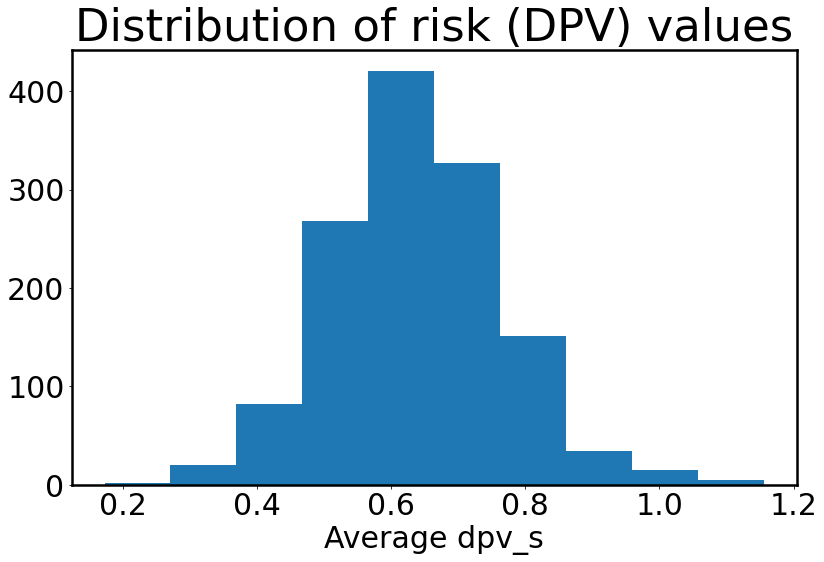

In [12]:
ax = plt_style(size=(13,8),
              titleSize=45,
              labelsSize=30,)
plt.hist(DF.label)
plt.xlabel('Average dpv_s')
plt.title('Distribution of risk (DPV) values');

## Dimension reduction (UMAP) and visualization
- using UMAP to reduce dimensions of 5 features and visualize on a 2D scatter plot.

In [13]:
data = DF.copy()
data.head(10)

,feature0,feature1,feature2,feature3,label
0,-0.792260,1.871683,0.308303,0.436050,0.776471
1,-0.731213,1.482708,-0.562319,0.205279,0.777505
2,-0.842377,1.730938,-0.443135,-0.052478,0.767880
3,-0.436107,1.810083,-0.334007,-0.531369,0.819167
4,-0.648587,1.810033,-0.750344,-0.507551,0.766063
5,-0.588563,1.775038,-0.882315,-0.555426,0.796525
6,-0.571793,1.933515,-0.861946,-0.701558,0.812675
7,-0.385611,1.985003,-0.773218,-0.970032,0.814431
8,-0.255324,2.111879,-0.512041,-1.148569,0.757925
9,-0.509556,2.014708,-0.937478,-0.906611,0.843811


In [14]:
# # Define UMAP
data_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)

# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(data_umap.fit_transform(data), columns = ['UMAP1','UMAP2'])
embedding.head()

,UMAP1,UMAP2
0,8.521834,1.323707
1,9.212497,3.032281
2,9.484731,2.853957
3,10.385477,4.068253
4,10.904001,4.928452


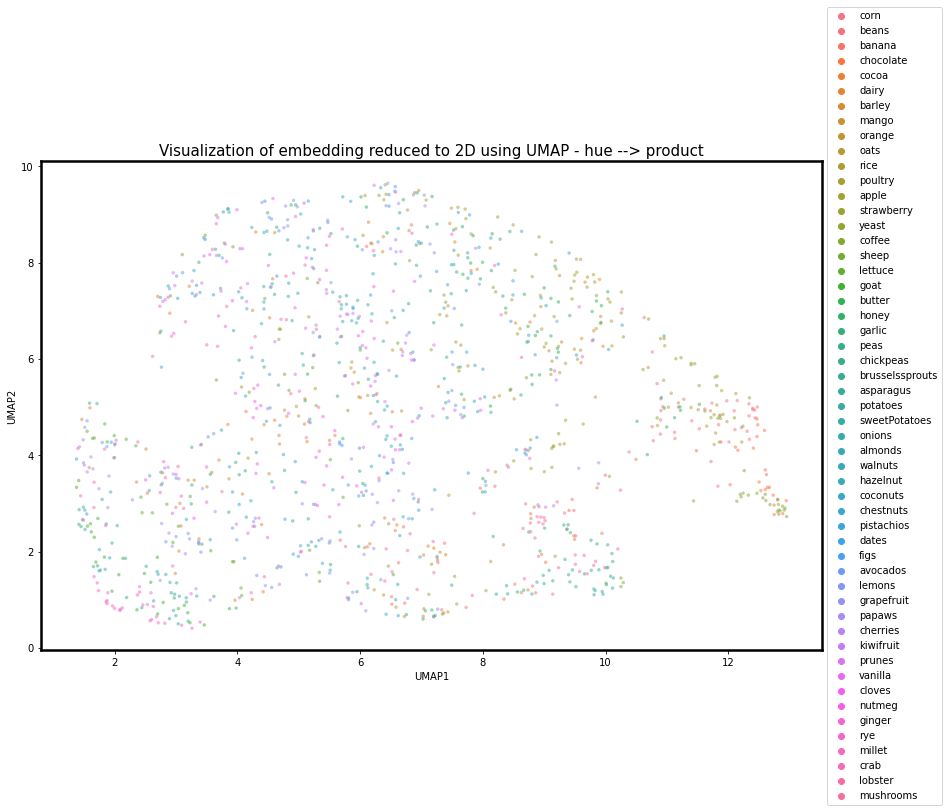

In [15]:
# Produce sns.scatterplot 
## set axis
ax = plt_style(size=(14,9),
              titleSize=15,
              labelsSize=10,)
## create plot
plt.title('Visualization of embedding reduced to 2D using UMAP - hue --> product')
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding, hue = dfNetworks['product'].to_list(),
                alpha=0.5, linewidth=0, s=12, cmap='rainbow', ax=ax) #hue=metadata.subclass_label.to_list(),
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5));

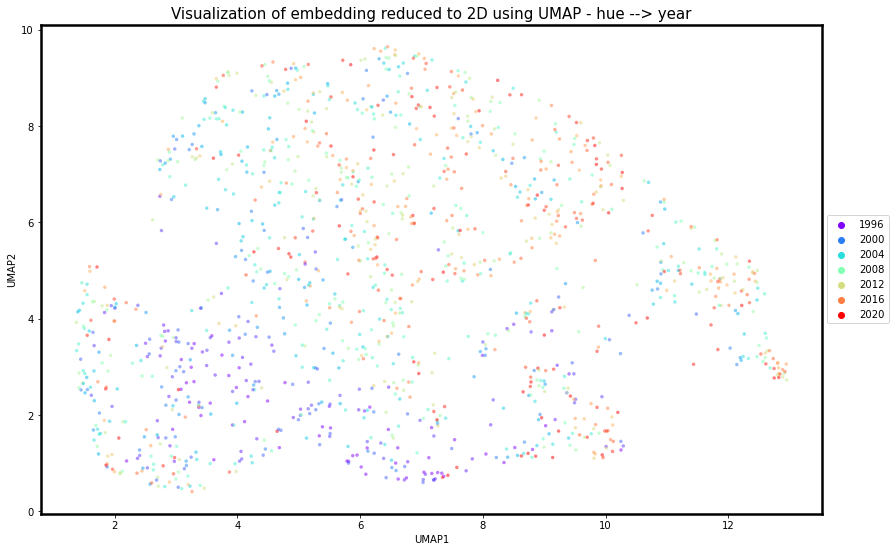

In [16]:
# Produce sns.scatterplot 
## set axis
ax = plt_style(size=(14,9),
              titleSize=15,
              labelsSize=10,)
## create plot
plt.title('Visualization of embedding reduced to 2D using UMAP - hue --> year')
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding, hue = dfNetworks['year'].to_list(),
                alpha=0.5, linewidth=0, s=12, palette='rainbow', ax=ax) #hue=metadata.subclass_label.to_list(),
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5));

## Clustering 
In this section we use 2 clustering algorithms ( Spectral and Agglomerative) to group the different product networks. We carry out the following analysis:
- investigate the right cluster size using silhouette profiles for spectral clustering and dendrogram for agglomerative clustering.
- Explore consistent cluster within ( changing random seed) and between selected algorithms
- Further analysis
    - characteristics of clusters of size = 4 and 6 
    - persistent groupings 


## Spectral clustering

In [18]:
## create spectral clustering object
sc = SpectralClustering(n_clusters=4, affinity = 'nearest_neighbors').fit(data)
labels = sc.labels_
labels

C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [19]:
## saving to dataframe 
print('clusters: ', labels)
dat_with_clusters = data.copy()
dat_with_clusters['Cluster'] = labels
addxFeats(dat_with_clusters,dfNetworks,
          col_names= ['product','year','nodes','edges','avg_clustering_coef'])

clusters:  [2 2 2 ... 2 2 2]


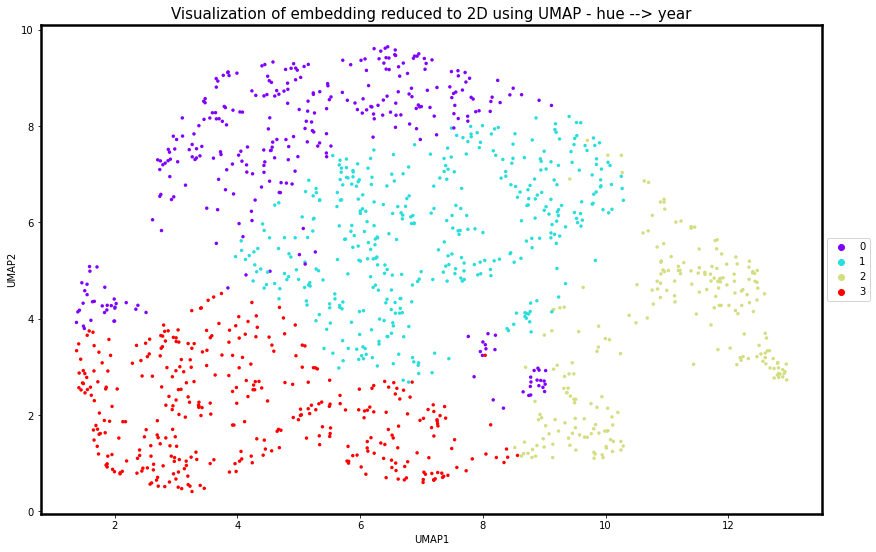

In [20]:
# Produce sns.scatterplot 
## set axis
ax = plt_style(size=(14,9),
              titleSize=15,
              labelsSize=10,)
## create plot
plt.title('Visualization of embedding reduced to 2D using UMAP - hue --> year')
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding, hue = labels,
                alpha=1, linewidth=0, s=12, palette='rainbow', ax = ax) 
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5));

## Silhouette Coefficient
Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [21]:
##  Evaluating the performance of affinity measures 

sc_ = SpectralClustering(n_clusters=4, affinity = 'nearest_neighbors').fit(data)
labels_nn = sc_.labels_

sc_ = SpectralClustering(n_clusters=4, affinity = 'rbf').fit(data)
labels_rbf = sc_.labels_

# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(data, labels_rbf))
s_scores.append(silhouette_score(data, labels_nn))
  
print(s_scores)

C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[0.25464799669398924, 0.2686838155501483]


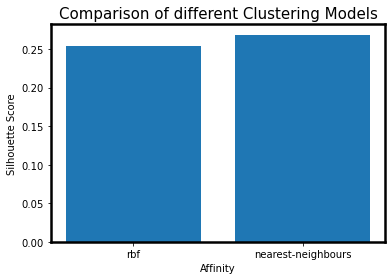

In [22]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

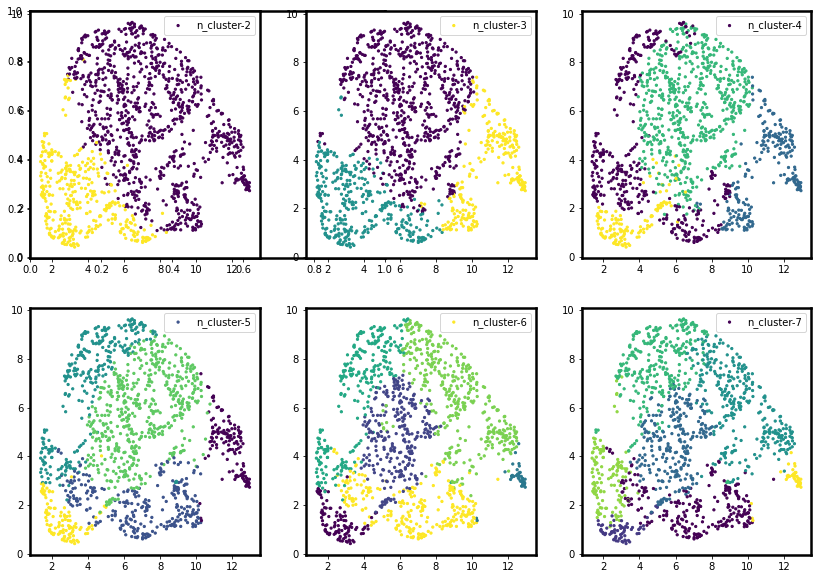

In [23]:
## Visualising cluster size 2-7 using spectral clustering
f = plt.figure(figsize=(14,10))
f.add_subplot(2, 2, 1)
## store tuples of (cluster_num, labels) in Labels lists
Labels = []
for i in range(2, 8):
    sc = SpectralClustering(n_clusters=i).fit(data)
    Labels.append((i, sc.labels_))
    f.add_subplot(2, 3, i-1)
    plt.scatter(embedding['UMAP1'], embedding['UMAP2'], s=5, c=sc.labels_, label="n_cluster-"+str(i))
    
    plt.legend()

plt.show() 

In [24]:
## saving to dataframe 
print('clusters: ', labels)
dat_with_allclusters = data.copy()
## create columns for all cluster labels
for ix, labels in Labels:
    dat_with_allclusters[f'Clusters_{ix}'] = labels

addxFeats(dat_with_allclusters,dfNetworks,
          col_names= ['product','year','nodes','edges','avg_clustering_coef'])


clusters:  [2 2 2 ... 2 2 2]


In [25]:
dat_with_allclusters.head()

,feature0,feature1,feature2,feature3,label,Clusters_2,Clusters_3,Clusters_4,Clusters_5,Clusters_6,Clusters_7,product,year,nodes,edges,avg_clustering_coef
0,-0.792260,1.871683,0.308303,0.436050,0.776471,0,2,0,1,5,0,corn,1996,102,906,0
1,-0.731213,1.482708,-0.562319,0.205279,0.777505,0,2,1,1,4,3,corn,1997,125,1367,0
2,-0.842377,1.730938,-0.443135,-0.052478,0.767880,0,2,1,1,4,0,corn,1998,132,1446,0
3,-0.436107,1.810083,-0.334007,-0.531369,0.819167,0,2,1,3,4,3,corn,1999,138,1721,0
4,-0.648587,1.810033,-0.750344,-0.507551,0.766063,0,2,1,0,4,3,corn,2000,163,2175,0


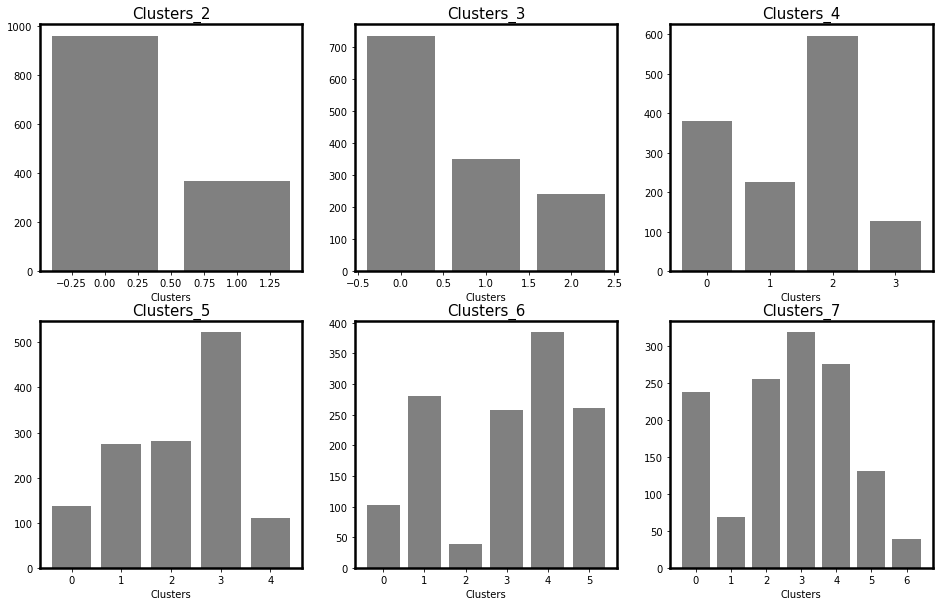

In [26]:
## Plot distribution of clusters for spectral clustering  
group_plotter(dat_with_allclusters, groupby= 'product', color = 'gray',agg='')    


For n_clusters = 2 The average silhouette_score is : 0.2950722816868338
For n_clusters = 3 The average silhouette_score is : 0.28173688783262674
For n_clusters = 4 The average silhouette_score is : 0.2546043746930422
For n_clusters = 5 The average silhouette_score is : 0.24234553993485908
For n_clusters = 6 The average silhouette_score is : 0.2516855695217362
For n_clusters = 7 The average silhouette_score is : 0.2526111176981691


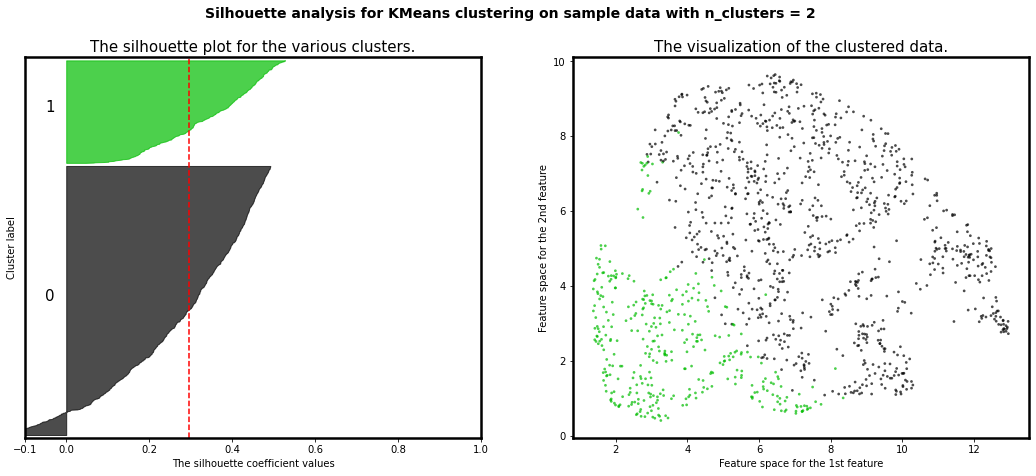

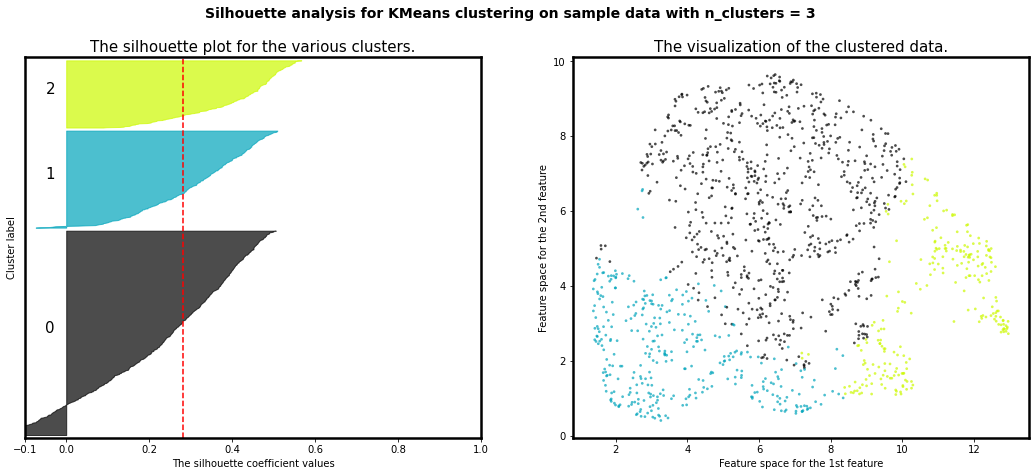

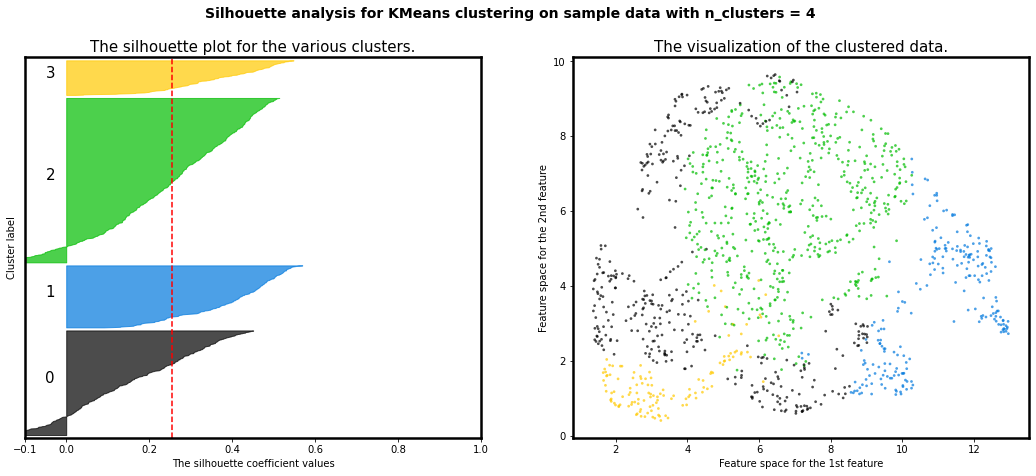

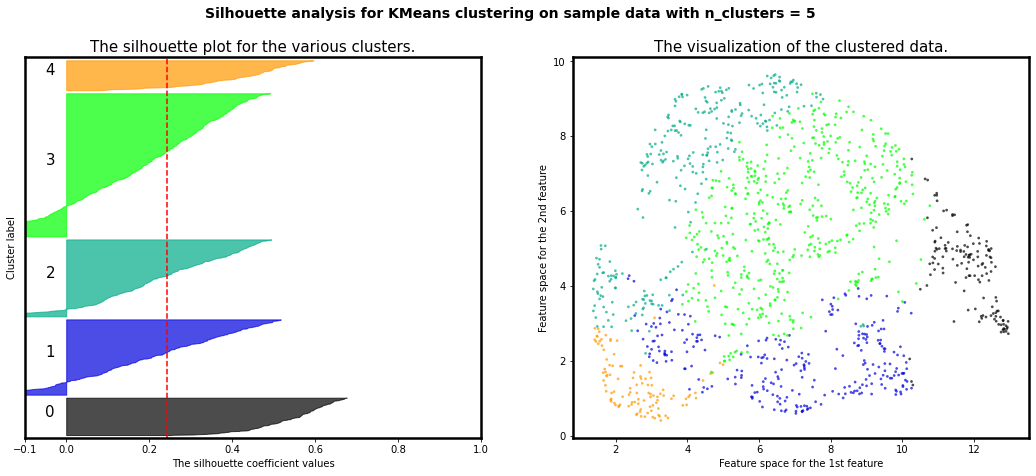

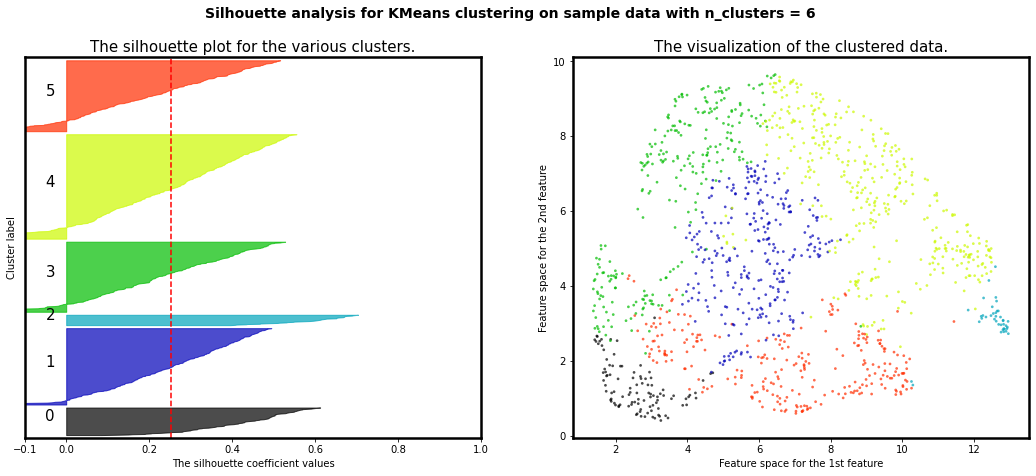

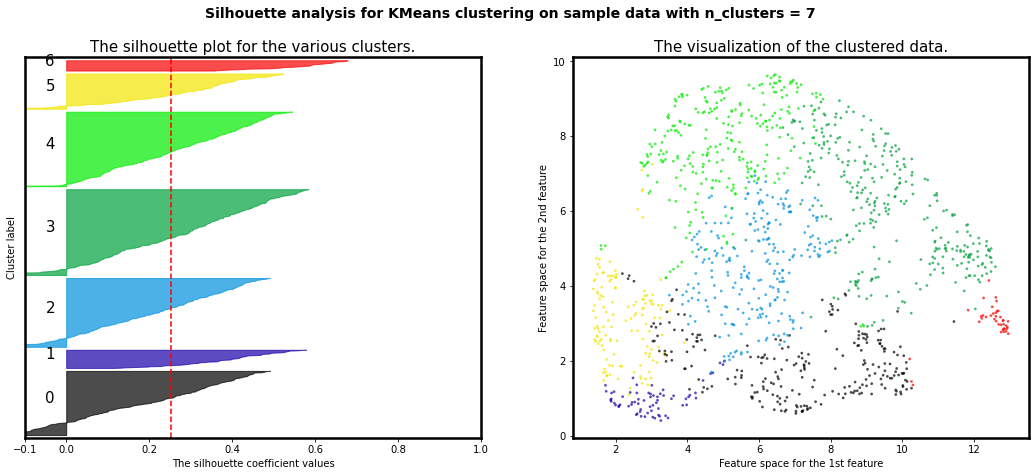

In [27]:
## Create silhouette plots to evaluate number of cluster 
X = data.copy()
# range_n_clusters = [2, 3, 4, 5, 6]

# for n_clusters in range_n_clusters:
for n_clusters, labels in Labels:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # set cluster labels for each iteration
    cluster_labels = labels
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( embedding['UMAP1'], embedding['UMAP2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [28]:
dat_with_allclusters.head()

,feature0,feature1,feature2,feature3,label,Clusters_2,Clusters_3,Clusters_4,Clusters_5,Clusters_6,Clusters_7,product,year,nodes,edges,avg_clustering_coef
0,-0.792260,1.871683,0.308303,0.436050,0.776471,0,2,0,1,5,0,corn,1996,102,906,0
1,-0.731213,1.482708,-0.562319,0.205279,0.777505,0,2,1,1,4,3,corn,1997,125,1367,0
2,-0.842377,1.730938,-0.443135,-0.052478,0.767880,0,2,1,1,4,0,corn,1998,132,1446,0
3,-0.436107,1.810083,-0.334007,-0.531369,0.819167,0,2,1,3,4,3,corn,1999,138,1721,0
4,-0.648587,1.810033,-0.750344,-0.507551,0.766063,0,2,1,0,4,3,corn,2000,163,2175,0


<Figure size 432x288 with 0 Axes>

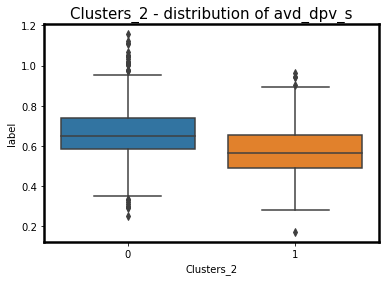

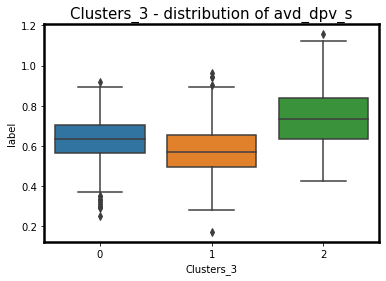

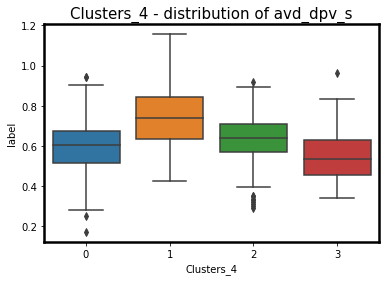

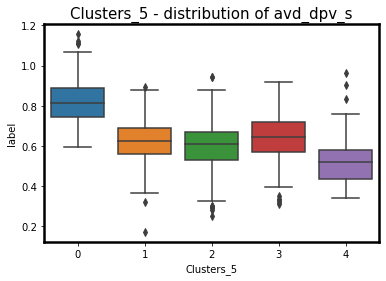

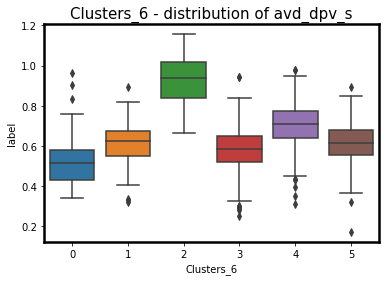

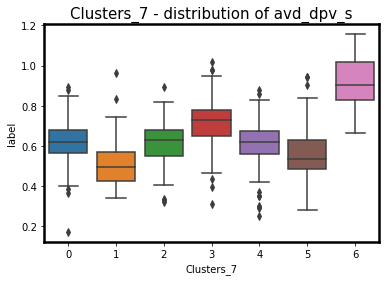

In [29]:
plt.figure()
for n_clusters, labels in Labels:
    plt.figure()
    ax = sns.boxplot(y="label", x=f'Clusters_{n_clusters}', data= dat_with_allclusters)
    plt.title(f'Clusters_{n_clusters} - distribution of avd_dpv_s');

In [30]:
## group statistics
group_stats(Labels, dat_with_allclusters, thresh1=0.5,
                thresh2= 0.33, agg='')

-------  --------  --------
cluster_2
-------  --------  --------
Fraction of product networks in group_0 cluster_2


product
yeast         1.00
beans         1.00
corn          1.00
coffee        1.00
chocolate     1.00
rice          1.00
apple         1.00
butter        0.96
dairy         0.96
mushrooms     0.96
onions        0.96
strawberry    0.96
honey         0.96
asparagus     0.92
poultry       0.92
cherries      0.88
peas          0.88
pistachios    0.84
walnuts       0.84
potatoes      0.84
orange        0.84
prunes        0.84
oats          0.84
sheep         0.84
lemons        0.84
almonds       0.84
hazelnut      0.84
garlic        0.84
dates         0.84
ginger        0.84
vanilla       0.80
cloves        0.80
figs          0.80
kiwifruit     0.80
mango         0.76
chickpeas     0.76
barley        0.76
lobster       0.76
coconuts      0.76
nutmeg        0.72
banana        0.72
grapefruit    0.64
crab          0.56
Name: Clusters_2, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_2
['yeast', 'beans', 'corn', 'coffee', 'chocolate', 'rice', 'apple', 'butter', 'dairy', 'mushrooms', 'onions', 'strawberry', 'honey', 'asparagus', 'poultry', 'cherries', 'peas', 'pistachios', 'walnuts', 'potatoes', 'orange', 'prunes', 'oats', 'sheep', 'lemons', 'almonds', 'hazelnut', 'garlic', 'dates', 'ginger', 'vanilla', 'cloves', 'figs', 'kiwifruit', 'mango', 'chickpeas', 'barley', 'lobster', 'coconuts', 'nutmeg', 'banana', 'grapefruit', 'crab', 'millet']
 
-------  --------  --------
cluster_2
-------  --------  --------
Fraction of product networks in group_1 cluster_2


product
papaws             1.00
lettuce            1.00
brusselssprouts    1.00
rye                1.00
goat               1.00
sweetPotatoes      0.84
avocados           0.72
cocoa              0.68
chestnuts          0.68
millet             0.64
Name: Clusters_2, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_2
['papaws', 'lettuce', 'brusselssprouts', 'rye', 'goat', 'sweetPotatoes', 'avocados', 'cocoa', 'chestnuts', 'millet', 'crab', 'grapefruit']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_0 cluster_3


product
butter        0.96
onions        0.96
strawberry    0.96
asparagus     0.92
hazelnut      0.92
oats          0.88
kiwifruit     0.88
nutmeg        0.84
barley        0.84
orange        0.84
vanilla       0.84
sheep         0.84
pistachios    0.84
prunes        0.84
lobster       0.84
walnuts       0.84
poultry       0.84
garlic        0.84
lemons        0.84
cloves        0.84
almonds       0.80
figs          0.80
chickpeas     0.80
dates         0.80
ginger        0.76
coconuts      0.76
dairy         0.72
cherries      0.72
apple         0.68
grapefruit    0.64
mango         0.64
honey         0.56
banana        0.52
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_3
['butter', 'onions', 'strawberry', 'asparagus', 'hazelnut', 'oats', 'kiwifruit', 'nutmeg', 'barley', 'orange', 'vanilla', 'sheep', 'pistachios', 'prunes', 'lobster', 'walnuts', 'poultry', 'garlic', 'lemons', 'cloves', 'almonds', 'figs', 'chickpeas', 'dates', 'ginger', 'coconuts', 'dairy', 'cherries', 'apple', 'grapefruit', 'mango', 'honey', 'banana', 'chestnuts', 'avocados', 'millet', 'cocoa', 'crab']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_1 cluster_3


product
papaws             1.00
goat               1.00
brusselssprouts    1.00
rye                1.00
lettuce            0.96
sweetPotatoes      0.76
millet             0.60
crab               0.60
avocados           0.56
chestnuts          0.52
cocoa              0.52
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_3
['papaws', 'goat', 'brusselssprouts', 'rye', 'lettuce', 'sweetPotatoes', 'millet', 'crab', 'avocados', 'chestnuts', 'cocoa', 'banana', 'grapefruit']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_2 cluster_3


product
beans        1.00
chocolate    1.00
coffee       1.00
corn         1.00
rice         0.96
yeast        0.84
peas         0.84
potatoes     0.80
mushrooms    0.60
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_3
['beans', 'chocolate', 'coffee', 'corn', 'rice', 'yeast', 'peas', 'potatoes', 'mushrooms', 'honey']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_0 cluster_4


product
lettuce          0.92
papaws           0.84
avocados         0.76
crab             0.68
cocoa            0.60
sweetPotatoes    0.52
banana           0.52
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_4
['lettuce', 'papaws', 'avocados', 'crab', 'cocoa', 'sweetPotatoes', 'banana', 'lobster', 'lemons', 'grapefruit', 'vanilla', 'mushrooms', 'chestnuts', 'sheep', 'millet', 'mango', 'coconuts']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_1 cluster_4


product
beans        1.00
chocolate    1.00
coffee       1.00
rice         0.96
corn         0.96
yeast        0.80
peas         0.80
potatoes     0.68
mushrooms    0.56
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_4
['beans', 'chocolate', 'coffee', 'rice', 'corn', 'yeast', 'peas', 'potatoes', 'mushrooms', 'honey']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_2 cluster_4


product
strawberry    0.96
butter        0.96
oats          0.92
dairy         0.88
onions        0.88
almonds       0.80
poultry       0.80
hazelnut      0.80
barley        0.80
chickpeas     0.76
asparagus     0.76
apple         0.76
garlic        0.76
ginger        0.76
cloves        0.72
walnuts       0.72
kiwifruit     0.72
dates         0.72
orange        0.68
figs          0.68
nutmeg        0.68
pistachios    0.68
prunes        0.64
sheep         0.56
coconuts      0.56
lobster       0.52
mango         0.52
lemons        0.52
cherries      0.52
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_4
['strawberry', 'butter', 'oats', 'dairy', 'onions', 'almonds', 'poultry', 'hazelnut', 'barley', 'chickpeas', 'asparagus', 'apple', 'garlic', 'ginger', 'cloves', 'walnuts', 'kiwifruit', 'dates', 'orange', 'figs', 'nutmeg', 'pistachios', 'prunes', 'sheep', 'coconuts', 'lobster', 'mango', 'lemons', 'cherries', 'grapefruit', 'vanilla', 'honey']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_3 cluster_4


product
rye                0.88
brusselssprouts    0.72
goat               0.72
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_4
['rye', 'brusselssprouts', 'goat', 'sweetPotatoes', 'chestnuts', 'millet']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_0 cluster_5


product
coffee       0.92
chocolate    0.88
corn         0.80
rice         0.80
beans        0.76
yeast        0.76
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_5
['coffee', 'chocolate', 'corn', 'rice', 'beans', 'yeast', 'honey']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_1 cluster_5


product
peas         1.00
potatoes     1.00
mushrooms    0.96
crab         0.80
banana       0.68
lettuce      0.56
mango        0.52
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_5
['peas', 'potatoes', 'mushrooms', 'crab', 'banana', 'lettuce', 'mango', 'avocados', 'cocoa', 'coconuts']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_2 cluster_5


product
papaws     0.60
lobster    0.56
vanilla    0.52
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_5
['papaws', 'lobster', 'vanilla', 'sheep', 'asparagus', 'millet', 'avocados', 'sweetPotatoes', 'lemons', 'chestnuts', 'lettuce', 'cocoa', 'pistachios']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_3 cluster_5


product
butter        0.88
oats          0.88
strawberry    0.80
dairy         0.80
apple         0.76
nutmeg        0.76
chickpeas     0.76
hazelnut      0.72
figs          0.72
prunes        0.72
onions        0.68
almonds       0.68
kiwifruit     0.68
poultry       0.68
barley        0.68
cloves        0.68
garlic        0.64
ginger        0.64
orange        0.60
walnuts       0.60
dates         0.56
pistachios    0.52
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_5
['butter', 'oats', 'strawberry', 'dairy', 'apple', 'nutmeg', 'chickpeas', 'hazelnut', 'figs', 'prunes', 'onions', 'almonds', 'kiwifruit', 'poultry', 'barley', 'cloves', 'garlic', 'ginger', 'orange', 'walnuts', 'dates', 'pistachios', 'sheep', 'grapefruit', 'asparagus', 'cherries', 'coconuts', 'honey', 'lobster', 'vanilla', 'lemons']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_4 cluster_5


product
brusselssprouts    1.00
rye                1.00
goat               0.92
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_5
['brusselssprouts', 'rye', 'goat', 'sweetPotatoes']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_0 cluster_6


product
brusselssprouts    0.96
rye                0.96
goat               0.88
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_6
['brusselssprouts', 'rye', 'goat', 'sweetPotatoes']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_1 cluster_6


product
hazelnut      0.72
barley        0.68
nutmeg        0.68
prunes        0.64
oats          0.64
kiwifruit     0.64
pistachios    0.60
cloves        0.60
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_6
['hazelnut', 'barley', 'nutmeg', 'prunes', 'oats', 'kiwifruit', 'pistachios', 'cloves', 'figs', 'sheep', 'onions', 'walnuts', 'grapefruit', 'chickpeas', 'chestnuts']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_2 cluster_6


product
coffee       0.92
chocolate    0.60
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_6
['coffee', 'chocolate']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_3 cluster_6


product
papaws     0.60
lobster    0.60
vanilla    0.56
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_6
['papaws', 'lobster', 'vanilla', 'sheep', 'chestnuts', 'asparagus', 'millet', 'sweetPotatoes', 'cocoa', 'lettuce', 'pistachios', 'avocados', 'onions']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_4 cluster_6


product
yeast         0.96
apple         0.92
corn          0.88
poultry       0.88
butter        0.88
beans         0.84
dairy         0.84
rice          0.80
honey         0.80
dates         0.72
strawberry    0.68
orange        0.64
cherries      0.60
almonds       0.52
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_6
['yeast', 'apple', 'corn', 'poultry', 'butter', 'beans', 'dairy', 'rice', 'honey', 'dates', 'strawberry', 'orange', 'cherries', 'almonds', 'garlic', 'ginger', 'mango', 'chickpeas', 'chocolate', 'lemons']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_5 cluster_6


product
potatoes     1.00
peas         1.00
mushrooms    0.92
crab         0.68
banana       0.68
lettuce      0.56
avocados     0.52
mango        0.52
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_5 cluster_6
['potatoes', 'peas', 'mushrooms', 'crab', 'banana', 'lettuce', 'avocados', 'mango', 'coconuts', 'cocoa']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_0 cluster_7


product
potatoes     1.00
peas         1.00
mushrooms    0.96
crab         0.72
banana       0.60
mango        0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_7
['potatoes', 'peas', 'mushrooms', 'crab', 'banana', 'mango', 'lettuce', 'coconuts']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_1 cluster_7


product
rye     0.80
goat    0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_7
['rye', 'goat', 'brusselssprouts']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_2 cluster_7


product
barley       0.72
nutmeg       0.64
cloves       0.60
hazelnut     0.56
figs         0.56
kiwifruit    0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_7
['barley', 'nutmeg', 'cloves', 'hazelnut', 'figs', 'kiwifruit', 'prunes', 'oats', 'sheep', 'walnuts', 'pistachios', 'chestnuts', 'chickpeas', 'millet']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_3 cluster_7


product
yeast         0.96
corn          0.84
beans         0.84
apple         0.84
rice          0.80
dairy         0.80
butter        0.76
poultry       0.72
honey         0.68
strawberry    0.64
dates         0.56
orange        0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_7
['yeast', 'corn', 'beans', 'apple', 'rice', 'dairy', 'butter', 'poultry', 'honey', 'strawberry', 'dates', 'orange', 'garlic', 'ginger', 'cherries', 'mango']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_4 cluster_7


product
asparagus    0.64
lobster      0.64
onions       0.60
vanilla      0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_7
['asparagus', 'lobster', 'onions', 'vanilla', 'sheep', 'pistachios', 'prunes', 'lemons', 'hazelnut', 'grapefruit', 'kiwifruit', 'almonds', 'walnuts']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_5 cluster_7


product
papaws             0.80
brusselssprouts    0.52
lettuce            0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_5 cluster_7
['papaws', 'brusselssprouts', 'lettuce', 'sweetPotatoes', 'goat']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_6 cluster_7


product
coffee       0.92
chocolate    0.56
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_6 cluster_7
['coffee', 'chocolate']
 


### Investigating n_clusters = 5

In [31]:
## Min dpv
print('Min DPV')
display(dat_with_allclusters.groupby('Clusters_5').min()[['label']])
print(" ")
## Average dpv
print('Average DPV')
display(dat_with_allclusters.groupby('Clusters_5').mean()[['label']])
print(" ")
## Max dpv
print('Max DPV')
dat_with_allclusters.groupby('Clusters_5').max()[['label']] #, 'nodes', 'edges', 'avg_clustering_coef']]

Min DPV


,label
Clusters_5,
0,0.597502
1,0.172411
2,0.253801
3,0.309405
4,0.343721


 
Average DPV


,label
Clusters_5,
0,0.826488
1,0.621090
2,0.599017
3,0.643955
4,0.529667


 
Max DPV


,label
Clusters_5,
0,1.155985
1,0.893787
2,0.945494
3,0.917058
4,0.963290


### Investigating n_clusters = 4

In [32]:
## Min dpv
print('Min DPV')
display(dat_with_allclusters.groupby('Clusters_4').min()[['label']])
print(" ")
## Average dpv
print('Average DPV')
display(dat_with_allclusters.groupby('Clusters_4').mean()[['label']])
print(" ")
## Max dpv
print('Max DPV')
dat_with_allclusters.groupby('Clusters_4').max()[['label']]

Min DPV


,label
Clusters_4,
0,0.172411
1,0.427663
2,0.294231
3,0.343721


 
Average DPV


,label
Clusters_4,
0,0.599167
1,0.748749
2,0.642421
3,0.547355


 
Max DPV


,label
Clusters_4,
0,0.945494
1,1.155985
2,0.917058
3,0.963290


## Hierarchical clustering

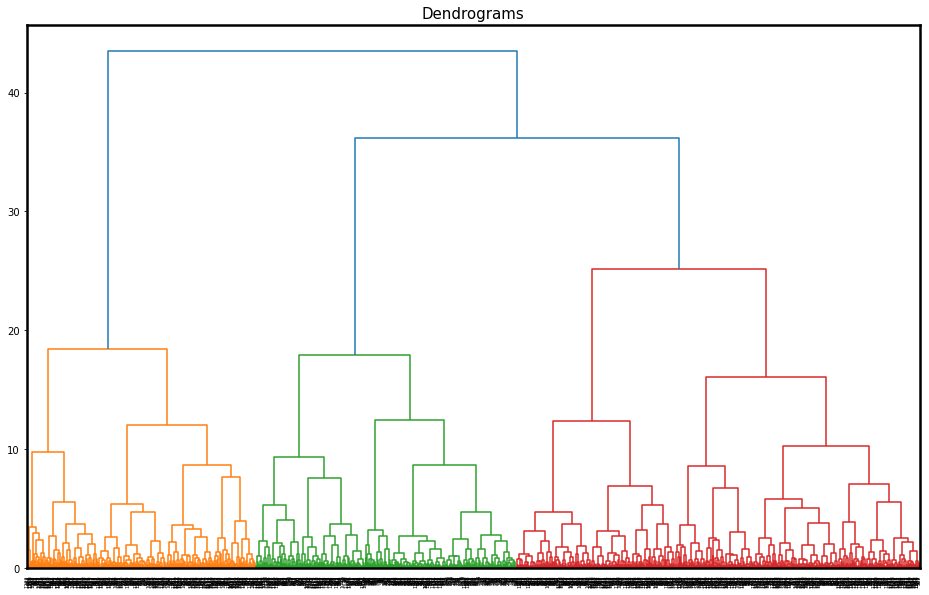

In [33]:
## Hierarchical clustering
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

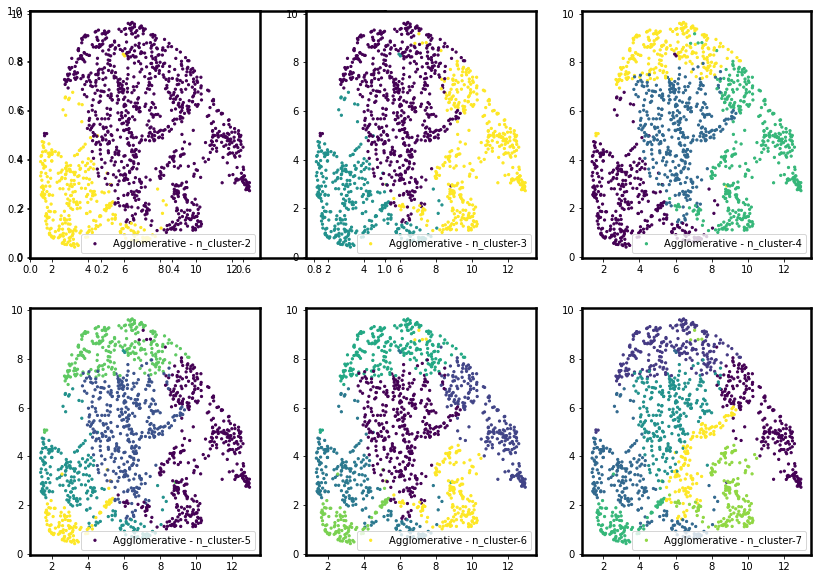

In [34]:
f = plt.figure(figsize=(14,10))
f.add_subplot(2, 2, 1)
## store tuples of (cluster_num, labels) in Labels lists
Labels_agg = []
for nclusters in range(2, 8):
#     sc = SpectralClustering(n_clusters=i).fit(data)
    cluster_ = AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='ward')  
    cluster_ = cluster_.fit_predict(data)
    Labels_agg.append((nclusters, cluster_))
    f.add_subplot(2, 3, nclusters-1)
    plt.scatter(embedding['UMAP1'], embedding['UMAP2'], s=5, c=cluster_, label="Agglomerative - n_cluster-"+str(nclusters))
    
    plt.legend()

plt.show() 

In [35]:
## saving to dataframe 
dat_with_allaggclusters = data.copy()
## create columns for all cluster labels
for ix, labels in Labels_agg:
    dat_with_allaggclusters[f'Clusters_{ix}'] = labels

addxFeats(dat_with_allaggclusters,dfNetworks,
          col_names= ['product','year','nodes','edges','avg_clustering_coef'])


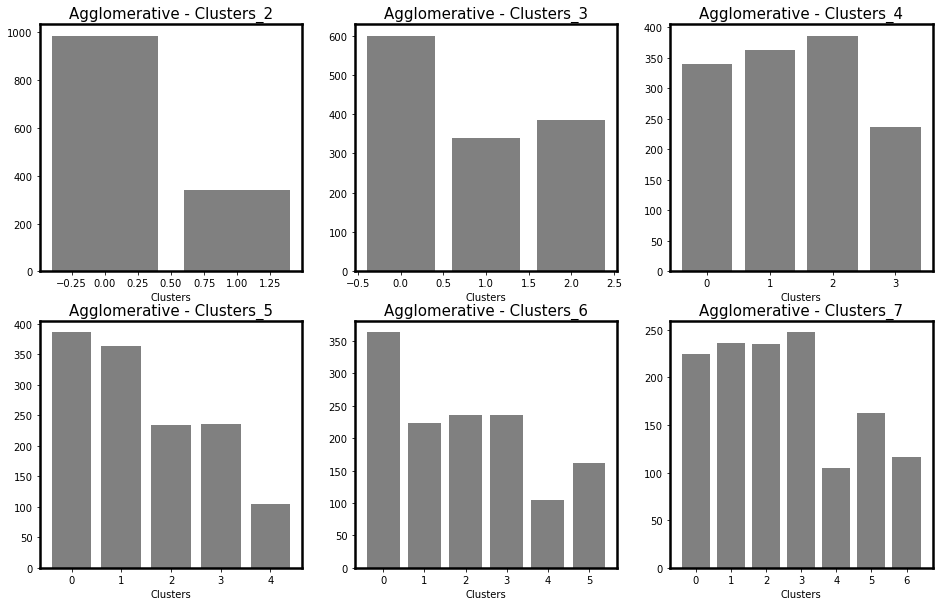

In [36]:
## Plot distribution of clusters for spectral clustering  
group_plotter(dat_with_allaggclusters, groupby= 'product', color = 'gray',agg='Agglomerative - ')    


<Figure size 432x288 with 0 Axes>

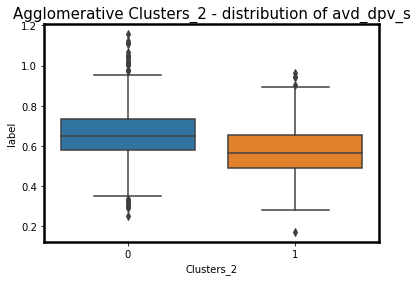

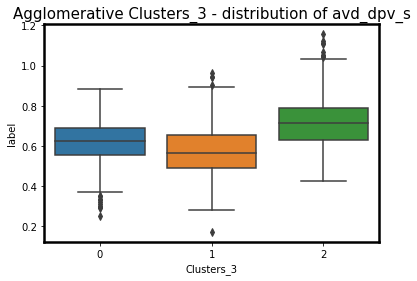

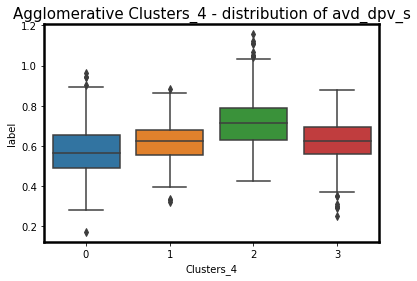

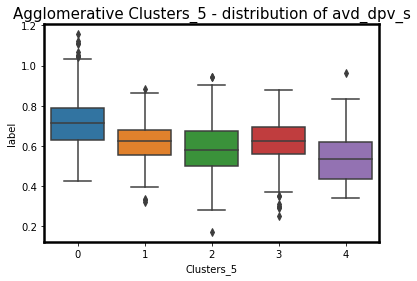

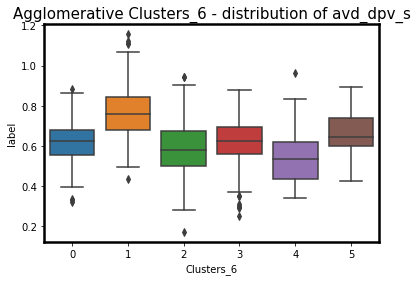

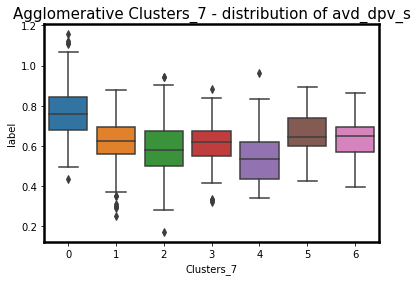

In [37]:
plt.figure()
for n_clusters, labels in Labels_agg:
    plt.figure()
    ax = sns.boxplot(y="label", x=f'Clusters_{n_clusters}', data= dat_with_allaggclusters)
    plt.title(f'Agglomerative Clusters_{n_clusters} - distribution of avd_dpv_s');

In [38]:
## group statistics
group_stats(Labels_agg, dat_with_allaggclusters, thresh1=0.5,
                thresh2= 0.33, agg='')

-------  --------  --------
cluster_2
-------  --------  --------
Fraction of product networks in group_0 cluster_2


product
yeast         1.00
coffee        1.00
strawberry    1.00
beans         1.00
chocolate     1.00
apple         1.00
corn          1.00
asparagus     0.96
rice          0.96
butter        0.96
mushrooms     0.96
honey         0.96
dairy         0.96
poultry       0.92
onions        0.92
hazelnut      0.92
cherries      0.92
walnuts       0.88
oats          0.88
ginger        0.88
prunes        0.88
peas          0.88
almonds       0.84
lemons        0.84
pistachios    0.84
potatoes      0.84
barley        0.84
kiwifruit     0.84
vanilla       0.84
dates         0.84
orange        0.84
sheep         0.80
cloves        0.80
garlic        0.80
nutmeg        0.80
figs          0.80
banana        0.76
coconuts      0.76
chickpeas     0.76
mango         0.72
lobster       0.68
grapefruit    0.68
crab          0.60
chestnuts     0.60
Name: Clusters_2, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_2
['yeast', 'coffee', 'strawberry', 'beans', 'chocolate', 'apple', 'corn', 'asparagus', 'rice', 'butter', 'mushrooms', 'honey', 'dairy', 'poultry', 'onions', 'hazelnut', 'cherries', 'walnuts', 'oats', 'ginger', 'prunes', 'peas', 'almonds', 'lemons', 'pistachios', 'potatoes', 'barley', 'kiwifruit', 'vanilla', 'dates', 'orange', 'sheep', 'cloves', 'garlic', 'nutmeg', 'figs', 'banana', 'coconuts', 'chickpeas', 'mango', 'lobster', 'grapefruit', 'crab', 'chestnuts', 'millet', 'cocoa', 'avocados']
 
-------  --------  --------
cluster_2
-------  --------  --------
Fraction of product networks in group_1 cluster_2


product
rye                1.00
brusselssprouts    1.00
papaws             1.00
goat               1.00
lettuce            0.96
sweetPotatoes      0.76
avocados           0.64
millet             0.60
cocoa              0.60
Name: Clusters_2, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_2
['rye', 'brusselssprouts', 'papaws', 'goat', 'lettuce', 'sweetPotatoes', 'avocados', 'millet', 'cocoa', 'crab', 'chestnuts']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_0 cluster_3


product
hazelnut      0.92
onions        0.88
prunes        0.88
walnuts       0.88
asparagus     0.88
kiwifruit     0.84
vanilla       0.84
pistachios    0.84
barley        0.84
sheep         0.80
cloves        0.80
nutmeg        0.80
strawberry    0.76
oats          0.76
figs          0.76
garlic        0.72
lobster       0.68
lemons        0.68
chickpeas     0.68
dates         0.64
grapefruit    0.64
orange        0.60
almonds       0.60
butter        0.60
ginger        0.60
chestnuts     0.60
coconuts      0.56
cherries      0.52
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_3
['hazelnut', 'onions', 'prunes', 'walnuts', 'asparagus', 'kiwifruit', 'vanilla', 'pistachios', 'barley', 'sheep', 'cloves', 'nutmeg', 'strawberry', 'oats', 'figs', 'garlic', 'lobster', 'lemons', 'chickpeas', 'dates', 'grapefruit', 'orange', 'almonds', 'butter', 'ginger', 'chestnuts', 'coconuts', 'cherries', 'millet', 'crab', 'cocoa', 'banana', 'apple']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_1 cluster_3


product
rye                1.00
brusselssprouts    1.00
papaws             1.00
goat               1.00
lettuce            0.96
sweetPotatoes      0.76
avocados           0.64
millet             0.60
cocoa              0.60
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_3
['rye', 'brusselssprouts', 'papaws', 'goat', 'lettuce', 'sweetPotatoes', 'avocados', 'millet', 'cocoa', 'crab', 'chestnuts']
 
-------  --------  --------
cluster_3
-------  --------  --------
Fraction of product networks in group_2 cluster_3


product
yeast        1.00
chocolate    1.00
corn         1.00
beans        1.00
coffee       1.00
mushrooms    0.96
rice         0.96
peas         0.88
potatoes     0.84
honey        0.76
dairy        0.72
poultry      0.64
apple        0.64
Name: Clusters_3, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_3
['yeast', 'chocolate', 'corn', 'beans', 'coffee', 'mushrooms', 'rice', 'peas', 'potatoes', 'honey', 'dairy', 'poultry', 'apple', 'mango', 'cherries', 'banana', 'butter']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_0 cluster_4


product
rye                1.00
brusselssprouts    1.00
papaws             1.00
goat               1.00
lettuce            0.96
sweetPotatoes      0.76
avocados           0.64
millet             0.60
cocoa              0.60
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_4
['rye', 'brusselssprouts', 'papaws', 'goat', 'lettuce', 'sweetPotatoes', 'avocados', 'millet', 'cocoa', 'crab', 'chestnuts']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_1 cluster_4


product
nutmeg        0.80
barley        0.76
hazelnut      0.72
onions        0.68
oats          0.68
cloves        0.68
kiwifruit     0.64
walnuts       0.60
strawberry    0.60
prunes        0.60
figs          0.56
pistachios    0.52
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_4
['nutmeg', 'barley', 'hazelnut', 'onions', 'oats', 'cloves', 'kiwifruit', 'walnuts', 'strawberry', 'prunes', 'figs', 'pistachios', 'lobster', 'sheep', 'chickpeas', 'coconuts', 'grapefruit', 'butter']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_2 cluster_4


product
yeast        1.00
chocolate    1.00
corn         1.00
beans        1.00
coffee       1.00
mushrooms    0.96
rice         0.96
peas         0.88
potatoes     0.84
honey        0.76
dairy        0.72
poultry      0.64
apple        0.64
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_4
['yeast', 'chocolate', 'corn', 'beans', 'coffee', 'mushrooms', 'rice', 'peas', 'potatoes', 'honey', 'dairy', 'poultry', 'apple', 'mango', 'cherries', 'banana', 'butter']
 
-------  --------  --------
cluster_4
-------  --------  --------
Fraction of product networks in group_3 cluster_4


product
asparagus    0.56
vanilla      0.52
Name: Clusters_4, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_4
['asparagus', 'vanilla', 'lemons', 'garlic', 'almonds', 'dates', 'sheep']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_0 cluster_5


product
yeast        1.00
chocolate    1.00
corn         1.00
beans        1.00
coffee       1.00
mushrooms    0.96
rice         0.96
peas         0.88
potatoes     0.84
honey        0.76
dairy        0.72
poultry      0.64
apple        0.64
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_5
['yeast', 'chocolate', 'corn', 'beans', 'coffee', 'mushrooms', 'rice', 'peas', 'potatoes', 'honey', 'dairy', 'poultry', 'apple', 'mango', 'cherries', 'banana', 'butter']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_1 cluster_5


product
nutmeg        0.80
barley        0.76
hazelnut      0.72
onions        0.68
oats          0.68
cloves        0.68
kiwifruit     0.64
walnuts       0.60
strawberry    0.60
prunes        0.60
figs          0.56
pistachios    0.52
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_5
['nutmeg', 'barley', 'hazelnut', 'onions', 'oats', 'cloves', 'kiwifruit', 'walnuts', 'strawberry', 'prunes', 'figs', 'pistachios', 'lobster', 'sheep', 'chickpeas', 'coconuts', 'grapefruit', 'butter']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_2 cluster_5


product
lettuce     0.96
papaws      0.84
avocados    0.64
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_5
['lettuce', 'papaws', 'avocados', 'cocoa', 'crab', 'sweetPotatoes']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_3 cluster_5


product
asparagus    0.56
vanilla      0.52
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_5
['asparagus', 'vanilla', 'lemons', 'garlic', 'almonds', 'dates', 'sheep']
 
-------  --------  --------
cluster_5
-------  --------  --------
Fraction of product networks in group_4 cluster_5


product
rye                0.88
brusselssprouts    0.76
goat               0.72
Name: Clusters_5, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_5
['rye', 'brusselssprouts', 'goat', 'sweetPotatoes']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_0 cluster_6


product
nutmeg        0.80
barley        0.76
hazelnut      0.72
onions        0.68
oats          0.68
cloves        0.68
kiwifruit     0.64
walnuts       0.60
strawberry    0.60
prunes        0.60
figs          0.56
pistachios    0.52
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_6
['nutmeg', 'barley', 'hazelnut', 'onions', 'oats', 'cloves', 'kiwifruit', 'walnuts', 'strawberry', 'prunes', 'figs', 'pistachios', 'lobster', 'sheep', 'chickpeas', 'coconuts', 'grapefruit', 'butter']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_1 cluster_6


product
chocolate    0.88
yeast        0.84
coffee       0.84
rice         0.80
corn         0.80
beans        0.72
honey        0.68
dairy        0.60
apple        0.56
poultry      0.52
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_6
['chocolate', 'yeast', 'coffee', 'rice', 'corn', 'beans', 'honey', 'dairy', 'apple', 'poultry', 'butter']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_2 cluster_6


product
lettuce     0.96
papaws      0.84
avocados    0.64
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_6
['lettuce', 'papaws', 'avocados', 'cocoa', 'crab', 'sweetPotatoes']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_3 cluster_6


product
asparagus    0.56
vanilla      0.52
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_6
['asparagus', 'vanilla', 'lemons', 'garlic', 'almonds', 'dates', 'sheep']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_4 cluster_6


product
rye                0.88
brusselssprouts    0.76
goat               0.72
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_6
['rye', 'brusselssprouts', 'goat', 'sweetPotatoes']
 
-------  --------  --------
cluster_6
-------  --------  --------
Fraction of product networks in group_5 cluster_6


product
mushrooms    0.96
peas         0.88
potatoes     0.84
Name: Clusters_6, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_5 cluster_6
['mushrooms', 'peas', 'potatoes', 'banana', 'mango']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_0 cluster_7


product
chocolate    0.88
yeast        0.84
coffee       0.84
rice         0.80
corn         0.80
beans        0.72
honey        0.68
dairy        0.60
apple        0.56
poultry      0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_0 cluster_7
['chocolate', 'yeast', 'coffee', 'rice', 'corn', 'beans', 'honey', 'dairy', 'apple', 'poultry', 'butter']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_1 cluster_7


product
asparagus    0.56
vanilla      0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_1 cluster_7
['asparagus', 'vanilla', 'lemons', 'garlic', 'almonds', 'dates', 'sheep']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_2 cluster_7


product
lettuce     0.96
papaws      0.84
avocados    0.64
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_2 cluster_7
['lettuce', 'papaws', 'avocados', 'cocoa', 'crab', 'sweetPotatoes']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_3 cluster_7


product
barley       0.72
hazelnut     0.72
oats         0.68
onions       0.64
nutmeg       0.60
kiwifruit    0.56
cloves       0.52
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_3 cluster_7
['barley', 'hazelnut', 'oats', 'onions', 'nutmeg', 'kiwifruit', 'cloves', 'prunes', 'lobster', 'strawberry', 'sheep', 'figs']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_4 cluster_7


product
rye                0.88
brusselssprouts    0.76
goat               0.72
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_4 cluster_7
['rye', 'brusselssprouts', 'goat', 'sweetPotatoes']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_5 cluster_7


product
mushrooms    0.96
peas         0.88
potatoes     0.84
Name: Clusters_7, dtype: float64

 
-------  --------  --------
 
unique products (filtered) in group_5 cluster_7
['mushrooms', 'peas', 'potatoes', 'banana', 'mango']
 
-------  --------  --------
cluster_7
-------  --------  --------
Fraction of product networks in group_6 cluster_7


Series([], Name: Clusters_7, dtype: float64)

 
-------  --------  --------
 
unique products (filtered) in group_6 cluster_7
['walnuts']
 
